In [2]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
data_serial = pd.read_csv("../data/serial_experiments.csv")
data_cuda = pd.read_csv("../data/cuda_experiments.csv")

In [4]:
data_serial = data_serial[(data_serial['m']>=500)*(data_serial['n']>=500)]
data_cuda = data_cuda[(data_cuda['m']>=500)*(data_cuda['n']>=500)]

In [5]:
ms = np.array([500, 1000, 5000, 10000, 50000, 100000])
ns = np.array([500, 1000, 5000, 10000])

In [6]:
def avg(data):
    res = np.full((len(ms), len(ns)), np.nan)
    err = np.full((len(ms), len(ns)), np.nan)
    for mi, m in enumerate(ms):
        for ni, n in enumerate(ns):
            res[mi,ni] = np.mean(data[(data['m']==m)*(data['n']==n)]['time [s]'].to_numpy())
            err[mi,ni] = np.std(data[(data['m']==m)*(data['n']==n)]['time [s]'].to_numpy())
    return res, err

In [7]:
def speedup(serial, cuda):
    res = np.full((len(ms), len(ns)), np.nan)
    err = np.full((len(ms), len(ns)), np.nan)
    avg_serial, std_serial = avg(serial)
    avg_cuda, std_cuda = avg(cuda)
    res = avg_serial/avg_cuda
    err = (std_serial*avg_cuda + avg_serial*std_cuda) / avg_cuda**2
    return res, err

In [8]:
avg_serial, std_serial = avg(data_serial)
avg_cuda, std_cuda = avg(data_cuda)
avg_speedup, err_speedup = speedup(data_serial, data_cuda)

In [13]:
avg_serial.min()

0.009218333333333334

/tmp/ipykernel_26559/1746368984.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
/tmp/ipykernel_26559/1746368984.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])


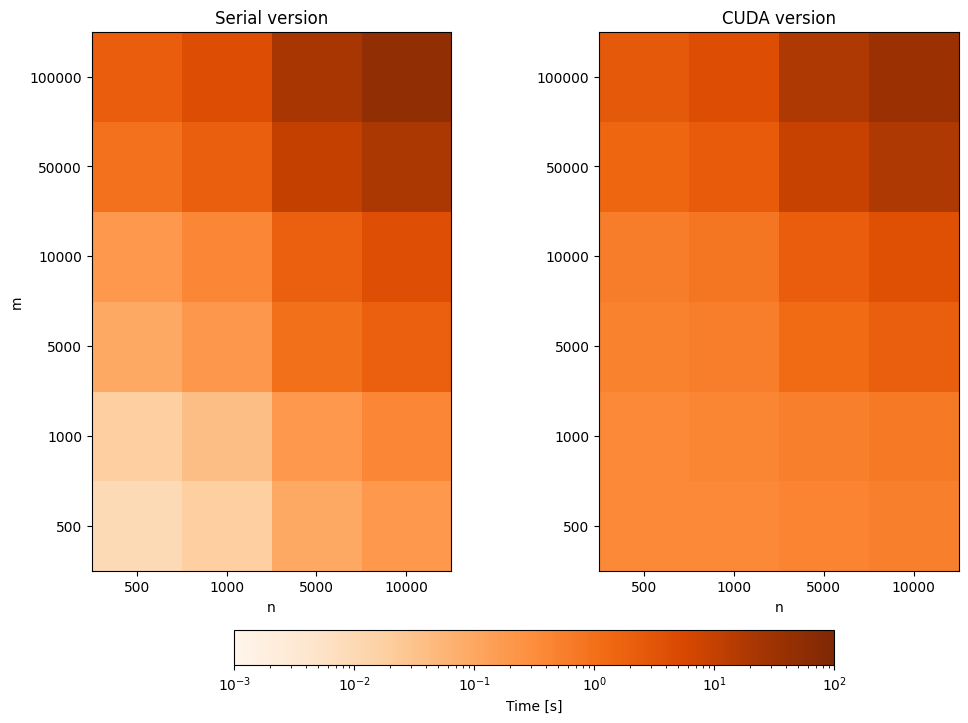

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,7))

im = ax[0].imshow(avg_serial, interpolation='none', vmin=1e-3, vmax=100, norm='log',
                  origin='lower', cmap='Oranges')
ax[0].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels([500, 1000, 5000, 10000])
ax[0].set_ylabel('m')
ax[0].set_xlabel('n')
ax[0].set_title('Serial version')

ax[1].imshow(avg_cuda, interpolation='none', vmin=1e-3, vmax=100, norm='log',
                  origin='lower', cmap='Oranges')
ax[1].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([500, 1000, 5000, 10000])
# ax[1].set_ylabel('m')
ax[1].set_xlabel('n')
ax[1].set_title('CUDA version')

cax = fig.add_axes([0.27, -0.025, 0.5, 0.05])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal', label='Time [s]')

fig.savefig('../img/time.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_26559/495414054.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
/tmp/ipykernel_26559/495414054.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])


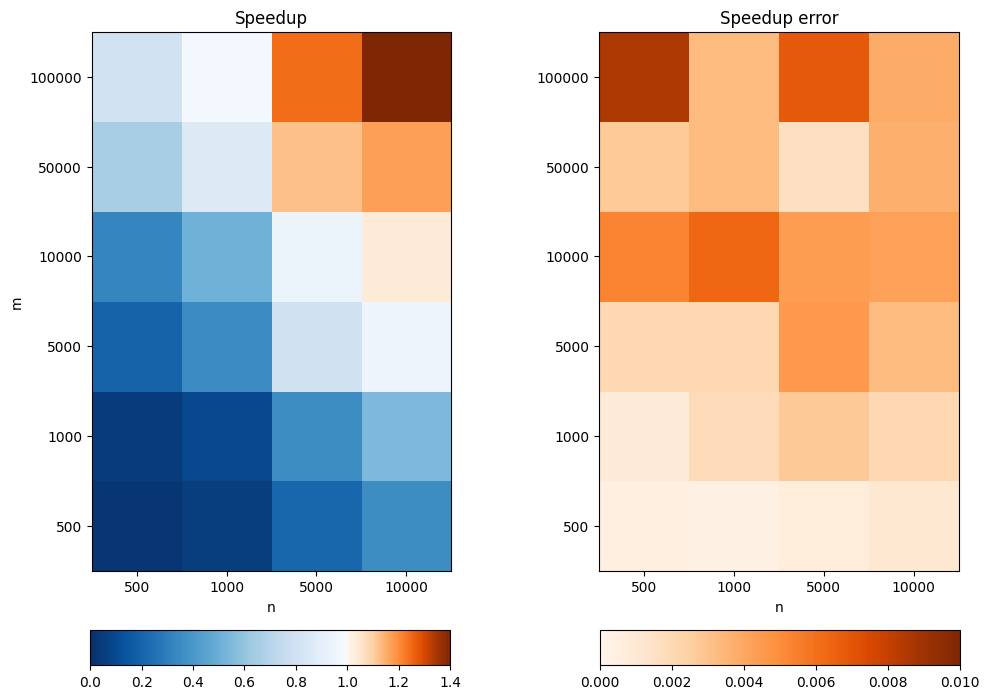

In [15]:
fig, ax = plt.subplots(1,2,figsize=(12,7))

speedup_min = 0
speedup_max = 1.4

i0 = 0
i1 = 1/1.4*256
i2 = 256

top = cm.get_cmap('Blues_r', int(1/speedup_max*256))
bottom = cm.get_cmap('Oranges', int((speedup_max-1)/speedup_max*256))



newcolors = np.vstack((top(np.linspace(0, 1, int(1/speedup_max*256))),
                       bottom(np.linspace(0, 1, int((speedup_max-1)/speedup_max*256)))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

im1 = ax[0].imshow(avg_speedup, interpolation='none', vmin=speedup_min, vmax=speedup_max,
                   norm='linear', origin='lower', cmap=newcmp)
ax[0].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels([500, 1000, 5000, 10000])
ax[0].set_ylabel('m')
ax[0].set_xlabel('n')
ax[0].set_title('Speedup')

cax1 = fig.add_axes([0.15, -0.025, 0.3, 0.05])
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')

im2 = ax[1].imshow(err_speedup, interpolation='none', vmin=0, vmax=1e-2, norm='linear',
                  origin='lower', cmap='Oranges')
ax[1].set_yticklabels([0, 500, 1000, 5000, 10000, 50000, 100000])
ax[1].set_xticks([0, 1, 2, 3])
ax[1].set_xticklabels([500, 1000, 5000, 10000])
# ax[1].set_ylabel('m')
ax[1].set_xlabel('n')
ax[1].set_title('Speedup error')

cax2 = fig.add_axes([0.575, -0.025, 0.3, 0.05])
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')

fig.savefig('../img/speedup.png', dpi=300, bbox_inches='tight')

In [17]:
data_serial[data_serial['m']==500]

,experiment,m,n,time [s]
24,1,500,500,0.009213
25,1,500,1000,0.018433
26,1,500,5000,0.093782
27,1,500,10000,0.189320
87,2,500,500,0.009230
88,2,500,1000,0.018444
89,2,500,5000,0.093721
90,2,500,10000,0.189423
150,3,500,500,0.009212
151,3,500,1000,0.018524
